In [249]:
import dpkt
import csv
import matplotlib.pyplot as plt
import socket
f = open("retry.pcap", "rb")
pcap  =  dpkt.pcap.Reader(f) 

In [250]:
rows = []
tslist = []
acklist = []
for ts, buf in pcap: 

    eth = dpkt.ethernet.Ethernet(buf) 

# This grabs the layer 3 (IP) object 
#  ... from inside the Ethernet frame 
# First we only want to consider IP packets 
#   ... there are likely some non-IP ethernet frames 
    
    if eth.type == dpkt.ethernet.ETH_TYPE_IP: 
        ip = eth.data 
    dst_ip_addr_str = socket.inet_ntoa(ip.dst)
    print(dst_ip_addr_str)
        
# Now we check and see if the protocol inside the IP packet 
#  ... Is actually TCP 
                
    if ip.p == dpkt.ip.IP_PROTO_TCP and dst_ip_addr_str == "20.52.64.200":
        tcp = ip.data 

    rows.append([ts, tcp.ack])
    tslist.append(ts)
    acklist.append(tcp.ack)
        
    
# Here we can then do something with the  the TCP header

239.255.255.250
239.255.255.250
20.52.64.200
20.52.64.200
239.255.255.250
10.133.15.138
239.255.255.250
10.133.15.138
20.52.64.200
137.22.1.7
137.22.1.7
20.52.64.200
20.52.64.200
10.133.15.138
10.133.15.138
137.22.1.7
137.22.1.7
137.22.1.7
137.22.1.7
137.22.1.7
137.22.1.7
10.133.15.138
10.133.15.138
10.133.15.138
10.133.15.138
10.133.15.138
10.133.15.138
137.22.1.7
137.22.1.7
23.76.205.34
172.217.4.78
10.133.15.138
10.133.15.138
137.22.1.7
137.22.1.7
10.133.15.138
10.133.15.138
172.217.4.78
172.217.4.78
10.133.15.138
10.133.15.138
10.133.15.138
172.217.4.78
172.217.4.78
172.217.4.78
10.133.15.138
137.22.1.7
137.22.1.7
10.133.15.138
10.133.15.138
137.22.1.7
137.22.1.7
137.22.1.7
137.22.1.7
137.22.1.7
137.22.1.7
172.217.4.78
10.133.15.138
10.133.15.138
10.133.15.138
10.133.15.138
10.133.15.138
10.133.15.138
137.22.1.7
137.22.1.7
10.133.15.138
10.133.15.138
137.22.1.7
137.22.1.7
137.22.1.7
137.22.1.7
137.22.1.7
137.22.1.7
10.133.15.138
10.133.15.138
137.22.1.7
137.22.1.7
137.22.1.7
137.22

In [251]:
fields = ['timestamp', 'acknowledgement']
csvfile = "pcaps.csv"

with open(csvfile, "w") as f:
    writer = csv.writer(f)
    writer.writerow(fields)
    writer.writerows(rows)

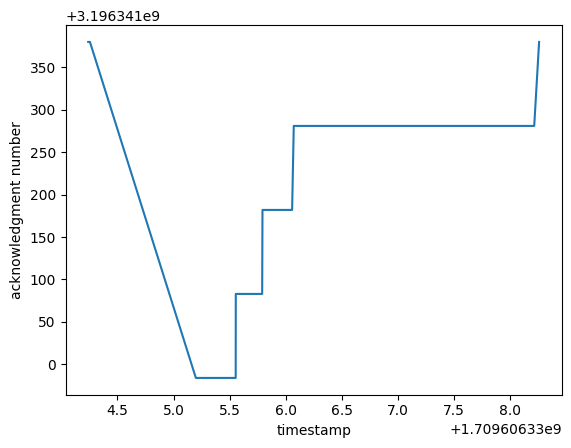

In [252]:
plt.plot(tslist, acklist, label='Loaded from file!')
plt.xlabel('timestamp')
plt.ylabel('acknowledgment number')
plt.show()